# TP3 – Perception des formes dans une image

# Exercice 1 : détection de pixels voisins ayant des gradients parallèles

In [1]:
%%file exercice_1.m

clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

% Parametres :
set(0,'RecursionLimit',1000);				% Pour eviter les erreurs a l'execution
alpha = pi/8;						% Seuil sur l'orientation du gradient (en radians)
cos_alpha = cos(alpha);
seuil_norme = 2/sin(alpha);				% Seuil sur la norme du gradient (decoule d'une etude theorique)

% Lecture de l'image :
I = imread('Images/Piree.png');
% I = imread('Images/chaises.png');
% I = imread('Images/Morlaix.png');
if size(I,3)==3
	I = rgb2gray(I);
end
I = imresize(I,0.8);					% Permet de limiter l'effet de crenelage
[nb_lignes,nb_colonnes] = size(I);

% Parametres :
diagonale = floor(sqrt(nb_lignes^2+nb_colonnes^2));
card_max = floor(diagonale/2);				% Cardinal max d'un ensemble E
card_min = floor(card_max/20);				% Cardinal min d'un ensemble E

% Affichage de l'image :
figure('Name','Ensembles candidats','Position',[0,0,L,0.67*H]);
subplot(1,2,1);
imagesc(I);
axis equal;
axis off;
colormap gray;
hold on;

% Gradient du niveau de gris (x vers la droite, y vers le bas) :
I = double(I);
[G_x,G_y] = gradient(I);
G_norme = sqrt(G_x.^2+G_y.^2);

% Selection des pixels de contour :
contour = G_norme>seuil_norme;

% Pas de pixel de contour sur le bord de l'image (traitement simplifie !) :
contour([1,nb_lignes],:) = 0;
contour(:,[1,nb_colonnes]) = 0;

% Affichage d'une petite fleche sur les pixels de contour :
[i,j] = find(contour);
quiver(j,i,G_x(contour),G_y(contour),'r');		% Attention : x = j et y = i
axis equal;
title('Pixels de contour','FontSize',30);
drawnow;

% Boucle de traitement des pixels de contour :
voisins = [ -1 -1 ; -1 0 ; -1 1 ; 0 1 ;...
		1 1 ; 1 0 ; 1 -1 ; 0 -1 ];		% Positions relatives des 8 plus proches voisins
liste_E = [];
while any(contour(:))

	% Pixel de contour dont la norme du gradient est la plus elevee = "germe" :
	indices_contour = find(contour);
	[~,indice_max] = max(G_norme(indices_contour));
	indice_germe = indices_contour(indice_max);
	[i_germe,j_germe] = ind2sub(size(I),indice_germe);
	E = [i_germe,j_germe];
	G_somme = [G_x(i_germe,j_germe),G_y(i_germe,j_germe)];

	% Construction recursive de l'ensemble E :
	[E,contour] = recursion(E,contour,G_somme,i_germe,j_germe,voisins,G_x,G_y,card_max,cos_alpha);

	% Ajout de l'ensemble E a la liste d'ensembles E, si son cardinal est superieur a card_min :
	if size(E,1)>=card_min
		liste_E = [liste_E,{E}];		% Concatenation d'une cellule {E} a liste_E
	end
end

% Affichage des ensembles E (la fonction label2rgb donne a chaque ensemble E une couleur differente) :
etiquette = zeros(size(I));
for k = 1:length(liste_E)
	E = liste_E{k};
	indices_E = sub2ind(size(I),E(:,1),E(:,2));
	etiquette(ind2sub(size(I),indices_E)) = k;
end
I_resultat = label2rgb(etiquette,'parula',[0.5,0.5,0.5]);
subplot(1,2,2);
imagesc(I_resultat);
axis equal;
axis off;
title('Ensembles candidats','FontSize',30);

save exercice_1;

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp3/donnees_TP3/exercice_1.m'.


In [2]:
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

In [3]:
% Parametres :
set(0,'RecursionLimit',1000);				% Pour eviter les erreurs a l'execution
alpha = pi/8;						% Seuil sur l'orientation du gradient (en radians)
cos_alpha = cos(alpha);
seuil_norme = 2/sin(alpha);				% Seuil sur la norme du gradient (decoule d'une etude theorique)


In [4]:
% Lecture de l'image :
I = imread('Images/Piree.png');
% I = imread('Images/chaises.png');
% I = imread('Images/Morlaix.png');
if size(I,3)==3
	I = rgb2gray(I);
end
I = imresize(I,0.8);					% Permet de limiter l'effet de crenelage
[nb_lignes,nb_colonnes] = size(I);


In [5]:
% Parametres :
diagonale = floor(sqrt(nb_lignes^2+nb_colonnes^2));
card_max = floor(diagonale/2);				% Cardinal max d'un ensemble E
card_min = floor(card_max/20);				% Cardinal min d'un ensemble E

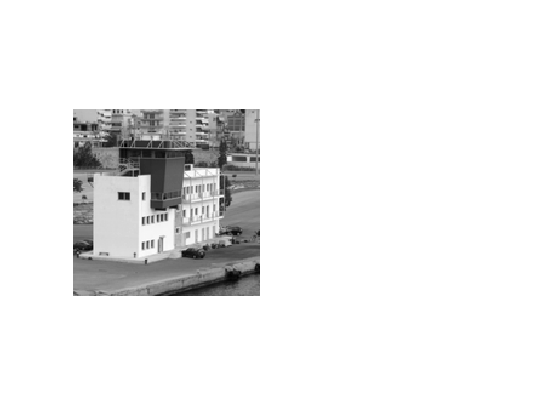

In [6]:
% Affichage de l'image :
figure('Name','Ensembles candidats','Position',[0,0,L,0.67*H]);
subplot(1,2,1);
imagesc(I);
axis equal;
axis off;
colormap gray;
hold on;

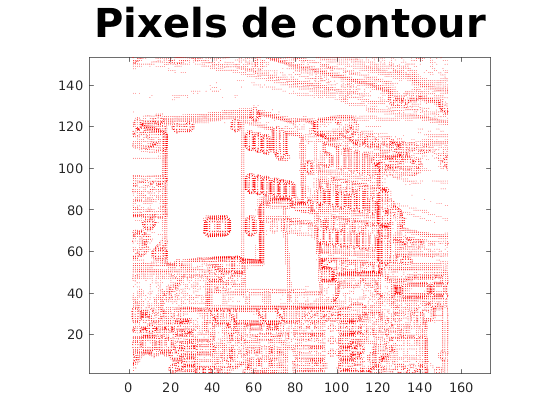

In [7]:
% Gradient du niveau de gris (x vers la droite, y vers le bas) :
I = double(I);
[G_x,G_y] = gradient(I);
G_norme = sqrt(G_x.^2+G_y.^2);

% Selection des pixels de contour :
contour = G_norme>seuil_norme;

% Pas de pixel de contour sur le bord de l'image (traitement simplifie !) :
contour([1,nb_lignes],:) = 0;
contour(:,[1,nb_colonnes]) = 0;

% Affichage d'une petite fleche sur les pixels de contour :
[i,j] = find(contour);
quiver(j,i,G_x(contour),G_y(contour),'r');		% Attention : x = j et y = i
axis equal;
title('Pixels de contour','FontSize',30);
drawnow;

In [9]:
%%file recursion.m
function [E,contour,G_somme] = recursion(E,contour,G_somme,i,j,voisins,G_x,G_y,card_max,cos_alpha)
% Fonction recursive permettant de construire un ensemble candidat E

contour(i,j) = 0;
G_somme_normalise = G_somme/norm(G_somme);
nb_voisins = size(voisins,1);
k = 1;

while k<=nb_voisins & size(E,1)<=card_max
	i_voisin = i+voisins(k, 1);				% A completer
	j_voisin = j+voisins(k, 2);				% A completer
	if contour(i_voisin,j_voisin)
        
		% Dans cette boucle, il vous faut :
		% - Calculer le produit scalaire entre G_somme_normalise et le gradient normalise de I au pixel voisin
        G_voisin = [G_x(i_voisin, j_voisin) G_y(i_voisin, j_voisin)];
        cos_angle = G_somme_normalise*(G_voisin/norm(G_voisin))';
        % - Si ce produit scalaire est superieur a cos_alp1ha :
        if cos_angle>cos_alpha
            %+ Mettre a jour "E" par concatenation
            E = [E; i_voisin j_voisin];
            %	+ Mettre a jour "G_somme"
            G_somme = G_somme+[G_x(i_voisin, j_voisin) G_y(i_voisin, j_voisin)];
            %	+ Lancer l'appel recursif sur le voisin
            [E,contour,G_somme] = recursion(E,contour,G_somme,i_voisin,j_voisin,voisins,G_x,G_y,card_max,cos_alpha);
        end


        
        

		end
    	k = k+1;
	end

end


Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp3/donnees_TP3/recursion.m'.


In [10]:
% Boucle de traitement des pixels de contour :
voisins = [ -1 -1 ; -1 0 ; -1 1 ; 0 1 ;...
		1 1 ; 1 0 ; 1 -1 ; 0 -1 ];		% Positions relatives des 8 plus proches voisins
liste_E = [];
while any(contour(:))

	% Pixel de contour dont la norme du gradient est la plus elevee = "germe" :
	indices_contour = find(contour);
	[~,indice_max] = max(G_norme(indices_contour));
	indice_germe = indices_contour(indice_max);
	[i_germe,j_germe] = ind2sub(size(I),indice_germe);
	E = [i_germe,j_germe];
	G_somme = [G_x(i_germe,j_germe),G_y(i_germe,j_germe)];

	% Construction recursive de l'ensemble E :
	[E,contour] = recursion(E,contour,G_somme,i_germe,j_germe,voisins,G_x,G_y,card_max,cos_alpha);

	% Ajout de l'ensemble E a la liste d'ensembles E, si son cardinal est superieur a card_min :
	if size(E,1)>=card_min
		liste_E = [liste_E,{E}];		% Concatenation d'une cellule {E} a liste_E
	end
end


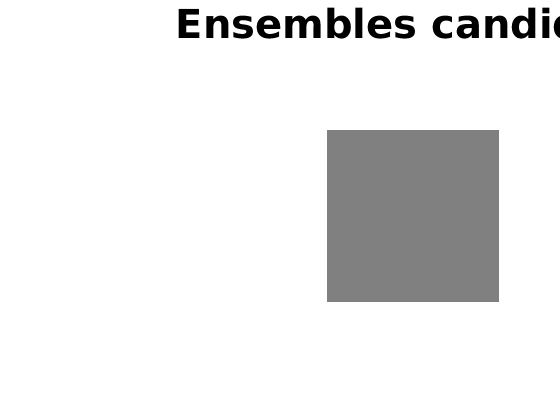

In [11]:
% Affichage des ensembles E (la fonction label2rgb donne a chaque ensemble E une couleur differente) :
etiquette = zeros(size(I));
for k = 1:length(liste_E)
	E = liste_E{k};
	indices_E = sub2ind(size(I),E(:,1),E(:,2));
	etiquette(ind2sub(size(I),indices_E)) = k;
end
I_resultat = label2rgb(etiquette,'parula',[0.5,0.5,0.5]);
subplot(1,2,2);
imagesc(I_resultat);
axis equal;
axis off;
title('Ensembles candidats','FontSize',30);


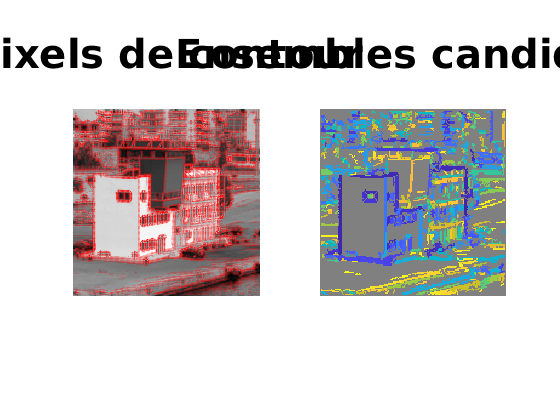

In [14]:
run("exercice_1.m")

## Exercice 2 : détection des alignements dans une image

In [15]:
%%file matrice_inertie.m

function [C_x, C_y, M] = matrice_inertie(E_x,E_y,G_norme_E)
    PI = sum(G_norme_E);
    C_x = E_x'*G_norme_E/PI;
    C_y = E_y'*G_norme_E/PI;
    M(1, 1) = ((E_x-C_x).*(E_x-C_x))'*G_norme_E/PI;
    M(2, 2) = ((E_y-C_y).*(E_y-C_y))'*G_norme_E/PI;
    M(1, 2) = ((E_x-C_x).*(E_y-C_y))'*G_norme_E/PI;
    M(2, 1) = M(1, 2);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp3/donnees_TP3/matrice_inertie.m'.


In [18]:
%%file test_matrice_inertie.m

[J,I] = meshgrid(1:5,1:5);
G_norme = I+J;
E = [ 1 2 ; 2 2 ; 2 3 ; 3 3 ; 3 4 ; 3 5 ];
indices_E = sub2ind(size(G_norme),E(:,1),E(:,2));

[C_x,C_y,M] = matrice_inertie(E(:,2),E(:,1),G_norme(indices_E));

eps = 0.0001;
if abs(C_x-3.4848)<eps & abs(C_y-2.5455)<eps & abs(M(1,1)-1.1589)<eps & abs(M(1,2)-0.5234)<eps & abs(M(2,2)-0.4298)<eps
	fprintf('La fonction matrice_inertie semble correcte !\n');
else
	fprintf('Attention : probleme !!!\n');
end


Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp3/donnees_TP3/test_matrice_inertie.m'.


In [19]:
run("test_matrice_inertie.m")

La fonction matrice_inertie semble correcte !


In [22]:
E_nouveau_repere


E_nouveau_repere =

   -2.7696   -0.3192
   -3.7856    0.6646
   -4.7854    0.6485
   -5.7853    0.6324
   -6.7852    0.6163
   -5.7692   -0.3675
   -4.7532   -1.3512
   -3.7694   -0.3353
   -4.7693   -0.3514
   -2.7857    0.6807
   -1.7697   -0.3030
   -0.7698   -0.2869
   -1.7858    0.6968
   -0.7859    0.7129
    0.2300   -0.2708
    0.2461   -1.2707
    1.2299   -0.2547
    0.2139    0.7291
    1.2138    0.7452
    2.2298   -0.2386
    2.2459   -1.2385
    3.2296   -0.2225
    2.2137    0.7613
    3.2135    0.7774
    4.2295   -0.2064
    5.2294   -0.1903
    4.2134    0.7935
    5.2133    0.8096
    6.2293   -0.1742
    6.2454   -1.1740
    7.2291   -0.1580
    6.2131    0.8257



In [34]:
min(E_nouveau_repere(:))


ans =

   -6.7852



In [58]:
%%file calcul_proba.m

function [x_min,x_max,probabilite] = calcul_proba(E_nouveau_repere,p)
    n = length(E_nouveau_repere);
    x_min = min(E_nouveau_repere(:));
    x_max = max(E_nouveau_repere(:));
    N = floor(x_max-x_min);
    probabilite = 1 - binocdf(N, n-1, p);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp3/donnees_TP3/calcul_proba.m'.


In [62]:
%%file exercice_2.m

clear;
close all;

load exercice_1;

% Parametres :
p = alpha/pi;
epsilon = 1e-20;

% Affichage de l'image :
figure('Name','Detection des alignements','Position',[0,0,L,0.67*H]);
subplot(1,2,1);
imagesc(I);
axis equal;
axis off;
colormap gray;
title('L''image','FontSize',30);
drawnow;

% Affichage d'un fond gris pour l'esquisse :
subplot(1,2,2);
imagesc(120*ones(size(I)),[0,255]);
axis equal;
axis off;
title('Son esquisse', 'FontSize', 30);
hold on;

% Boucle sur les ensembles E :
nb_elimines = 0;
for k = 1:length(liste_E)

	% Calcul de la matrice d'inertie de l'ensemble candidat numero k :
	E = liste_E{k};
	E_x = E(:,2);					% Attention : x = j
	E_y = E(:,1);					% Attention : y = i
	indices_E = sub2ind(size(I),E_y,E_x);
	G_norme_E = G_norme(indices_E);
	[C_x, C_y, M] = matrice_inertie(E_x, E_y, G_norme_E);

	% Calcul des valeurs/vecteurs propres de M :
	[V,D] = eig(M);

	% Tri des valeurs propres de M par ordre decroissant :
	[~,indices] = sort(diag(D),'descend');

	% Matrice de passage du repere xy vers les axes propres du nuage de points :
	P = V(:, indices);

	% Coordonnees des points du nuage apres rotation dans le repere des axes principaux :
	E_nouveau_repere = [E_x-C_x,E_y-C_y]*P;

	% Calcul de probabilite (loi binomiale) :
	[x_min, x_max, probabilite] = calcul_proba(E_nouveau_repere,p);

	% Test de saillance visuelle :
	if probabilite<epsilon				% Si l'evenement est suffisamment rare
		% Affichage du segment :
		extremites = P*[x_min x_max ; 0 0]+[C_x C_x ; C_y C_y];
		line(extremites(1,:),extremites(2,:),'Color','w','LineWidth',2);
		drawnow;
	else
		nb_elimines = nb_elimines+1;
	end
end
fprintf( 'Sur %d ensembles candidats, %d ont ete elimines\n',length(liste_E),nb_elimines);


Created file '/home/jblancho/Le-TP-de-Keunotor/probas/tp/tp3/donnees_TP3/exercice_2.m'.


Sur 605 ensembles candidats, 573 ont ete elimines


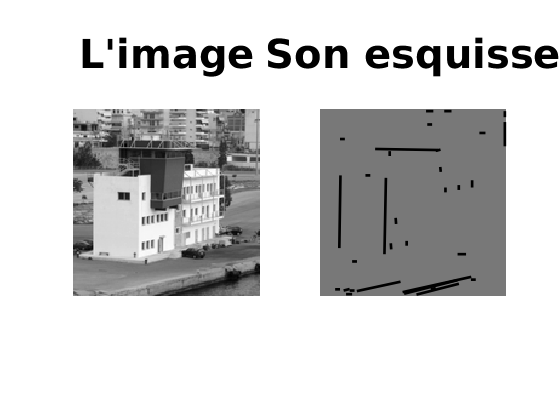

In [64]:
run("exercice_2.m")